# Comparing the objective value for different grids/meshes for partial coverage

We compare
1. Mesh with partial coverage
2. Mesh with full coverage (is it worth to optimize for partial coverage?)
3. Triangular Grid
4. Triangular Grid with full coverage

Meshes show the better performance and we, thus, use meshes as default.

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme()

data = pd.read_json("./04_data.json")

In [12]:
# Sorting for nice order in plot
data.sort_values(["solver"], inplace=True, ascending=True)
data.sort_values(["type"], inplace=True, ascending=True, kind="stable")

*The following plot cuts off some extreme outliers*

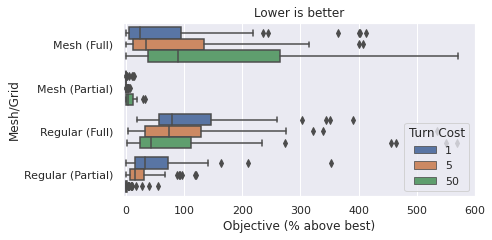

In [13]:
plt.figure(figsize=(7, 3.5))
plt.title("Lower is better")
sns.boxplot(data=data, y="solver", x="relative_obj", orient="h", hue="turn_factor")
plt.xlabel("Objective (% above best)")
# plt.xscale('log')
plt.xlim(-5, 600)
plt.ylabel("Mesh/Grid")
plt.tight_layout()
plt.legend(loc="lower right", title="Turn Cost")
plt.savefig("04_objectives.pdf")
plt.show()

Without cutting off, it would look like this:

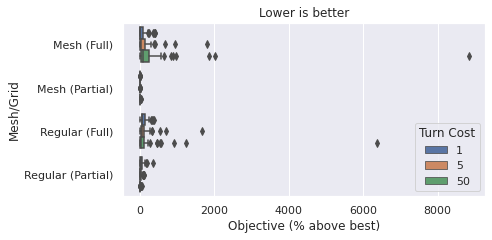

In [14]:
plt.figure(figsize=(7, 3.5))
plt.title("Lower is better")
sns.boxplot(data=data, y="solver", x="relative_obj", orient="h", hue="turn_factor")
plt.xlabel("Objective (% above best)")
# plt.xscale('log')
plt.ylabel("Mesh/Grid")
plt.tight_layout()
plt.legend(loc="lower right", title="Turn Cost")
plt.show()

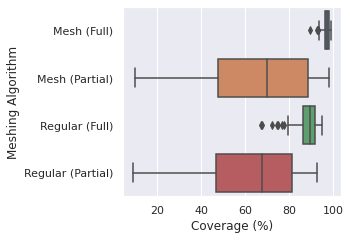

In [15]:
plt.figure(figsize=(5, 3.5))
sns.boxplot(data=data, y="solver", x="relative_coverage", orient="h")
plt.xlabel("Coverage (%)")
plt.ylabel("Meshing Algorithm")

plt.tight_layout()
plt.show()

In [16]:
t_ = data.dropna()
t_ = t_.groupby(["solver"])["instance"].nunique()
t_

solver
Mesh (Full)          200
Mesh (Partial)       200
Regular (Full)       200
Regular (Partial)    200
Name: instance, dtype: int64

In [17]:
t = data.groupby(["solver"])["runtime"].mean().reset_index()
t["solver"] = t["solver"].apply(lambda s: s.replace("□", "$\\square$"))
t["solver"] = t["solver"].apply(lambda s: s.replace("△", "$\\Delta$"))
t["solver"] = t["solver"].apply(lambda s: s.replace("%", "\\%"))
for i, t in t.iterrows():
    print(t["solver"], "&", round(t["runtime"], 1), "\\\\")

Mesh (Full) & 150.3 \\
Mesh (Partial) & 119.8 \\
Regular (Full) & 115.3 \\
Regular (Partial) & 94.5 \\
